# AutoPandas

<img src="logo_autodata.png" alt="drawing" width="200"/>

<center><h2> Process, visualize and use data easily.</h2></center>

In [27]:
import autopandas as ad
%reload_ext autoreload
%autoreload 2

# 1. Read data

#### Easily load CSV, AutoML or pd.DataFrame.

ad.AutoData is a subclass of pd.DataFrame representing 2D data frames:
* Examples are in rows
* Features are in columns

In [28]:
#input_file = 'autopandas/data/wine.csv'
input_file = 'autopandas/data/adult.csv'
data = ad.read_csv(input_file)

**Keys:**
* **Row**: train, valid, test, header
* **Column**: X, y, categorical, numerical

In [29]:
data.indexes['numerical']

['fnlwgt']

In [30]:
data.get_data('header')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Set the target variable (class) if needed

In [31]:
#data.set_class('quality') 
data.set_class(['age', 'fnlwgt']) #['income', 'gender'] # multiclass

#data.train_test_split(test_size=0.3) # already done automatically

#### Get a subset of data

In [32]:
#data.get_data('X_header')          # five first rows of X (examples without the class target)
data.get_data('categorical_header') # five first rows of categorical variables
#data.get_data('y_test')            # test set of target
#data.get_data('numerical_header')  # five first rows of numerical variables

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Descriptors

In [33]:
print(data.get_task())
print(data.shape)
print(data.ratio()) # ratio dimension / number of examples
print(data.symbolic_ratio())  # ratio of symbolic attributes
print(data.missing_ratio())   # ratio of missing values
print(data.class_deviation()) # 
print(data.skew().max())  # max skewness
print(data.skew().mean()) # mean skewness
data.describe()

regression
(48842, 15)
0.00030711273084640267
0.06666666666666667
0.0
52808.86796654579
11.894658996587946
3.0638608083339345


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# 2. Processings


Parameters: **method** and **key** (targeted set).

**Missing values imputation**

In [36]:
data = data.imputation() # mean, median, remove, most

**Encoding**

In [37]:
data = data.encoding('label', 'categorical') # encode categorical variables
#data = data.encoding('one_hot', 'categorical',) # one_hot, likelihood, count, target, etc.

#data.encoding('drop', 'numerical') # simply drop numerical columns

**Normalization**

In [38]:
data = data.normalization('standard', 'numerical') # min-max, standard
#data2 = data.normalization('min-max', 'numerical')

In [39]:
data.min(axis=0)

age                0.000000
workclass          0.000000
fnlwgt            -1.683245
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.000000
income             0.000000
dtype: float64

#### Dimensionality reduction

In [40]:
data.reduction(method='hashing').get_data('header') # pca, lda, tsne, feature_hashing

,0,1,2,3,4,5,6,7,8,9
0,29.0,3.782179,0.0,-1.0,0.0,0.0,-8.0,0.0,-7.0,58.0
1,39.0,2.683941,0.0,-4.0,0.0,0.0,-8.0,0.0,-7.0,78.0
2,39.0,2.523821,0.0,0.0,-1.0,-2.0,-2.0,0.0,-4.0,89.0
3,39.0,4.424278,0.0,-3.0,0.0,-4.0,-10.0,0.0,-8.0,55.0
4,44.0,2.686141,0.0,0.0,-1.0,-2.0,-12.0,0.0,-7.0,70.0


# 3. Visualization

#### Class distribution

y set plot


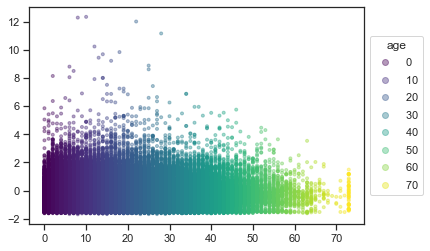

In [41]:
data.plot('y') # alias data.get_data('y').plot()

#### 2D PCA plot

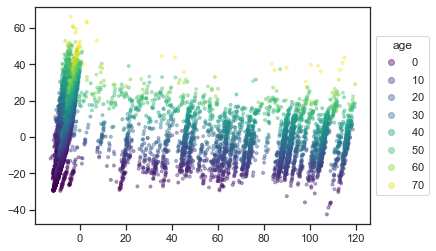

In [42]:
# for class coloration: c=data.get_data('y')
# class is used for coloration by default but the dimensionality reduction erased the class column
data.pca(n_components=2).plot(c=data.get_data('y'))

#### T-SNE

In [43]:
#data.tsne().plot(c=data.get_data('y'))

#### Linear Discriminant Analysis

Use set_class method to define another target before calling lda.


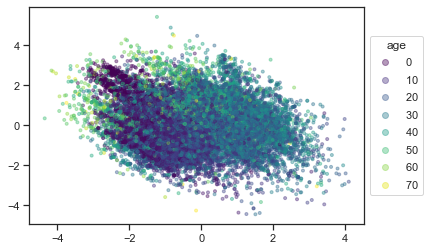

In [45]:
data.get_data('train').lda(n_components=2).plot(c=data.get_data('y_train'))

#### Heatmap

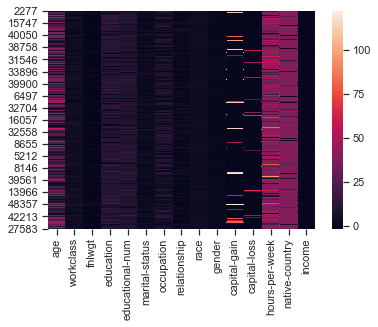

In [46]:
data.plot() # alias data.heatmap()

#### Correlation matrix plot

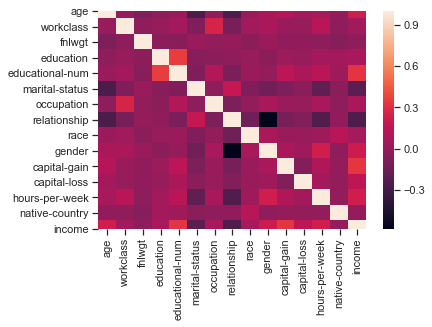

In [47]:
data.corr().plot() # alias data.correlation()

#### Features pairplot

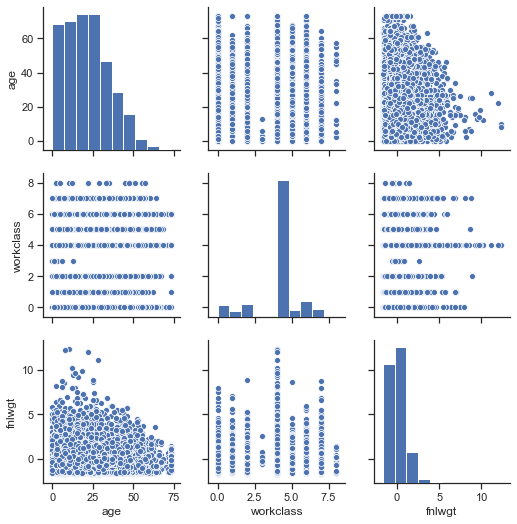

In [48]:
data[data.columns[:3]].pairplot() # max_features is set to 12 by default

#### Features boxplot

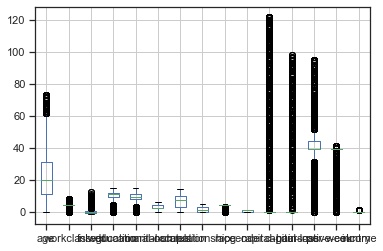

In [49]:
data.boxplot()

# 4. Benchmark

#### Compute a model's score on the task

By default, the method naturally train model on train set and test it on test set.

In [51]:
#data.set_class('income')
data.score()

0.8511567597079096

In [128]:
data.set_class('pH')
data.score()

0.03403675970047652

#### Call auto-sklearn

In [129]:
# data.score(method='automatic')

#### Compute score with custom model and scoring function

In [130]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

data.score(model=LogisticRegression(), metric=f1_score)

0.025718699320433195

# 5. Comparison

#### Two similar datasets (subsets of the same distribution)

In [52]:
ad1 = ad.read_csv('autopandas/data/squares1.csv') # CSV separator is infered automatically
ad2 = ad.read_csv('autopandas/data/squares2.csv')

### 3 types of distances:

#### 1) Between points

...

#### 2) Between columns
* Kolmogorov-Smirnof
* Mutual information
* Jensen-Shannon

#### 3) Between distributions (datasets)

#### Nearest Neihbors Adversarial Accuracy

In [53]:
ad1.distance(ad2)

0.03063369541444505

* Euclidean?
* MMD?
* etc.

#### Adversarial score / Binary classification / Discriminant / Classifier score

In [54]:
print(ad1.distance(ad2, method='discriminant'))

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20, 20))
print(ad1.distance(ad2, method='discriminant', model=model))

0.5376923076923077
0.5161538461538462


#### Task score
Some possible parameters: model, metric.

In [134]:
ad1.set_class('0.0.29')
ad2.set_class('0.0.29')
print(ad1.score(verbose=True)) # Trained on ad1 and tested on ad1 (with split)
print(ad2.score()) # Trained on ad2 and tested on ad2 (with split)
print(ad1.score(test=ad2)) # Trained on ad1 and tested on ad2
print(ad2.score(test=ad1)) # Trained on ad2 and tested on ad1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1153
         1.0       1.00      1.00      1.00       739
         5.0       1.00      1.00      1.00       208

   micro avg       1.00      1.00      1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100

Metric: <function accuracy_score at 0x7f166843cb70>
0.9990476190476191
0.9983333333333333
0.9990476190476191
0.9977777777777778


### Overlay plot

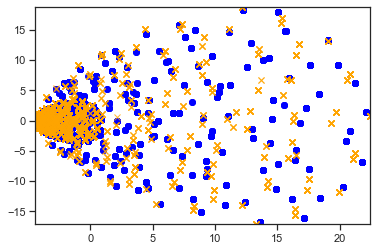

In [55]:
pca1 = ad1.pca(n_components=2)
pca2 = ad2.pca(n_components=2)
pca1.plot(ad=pca2) # alias ad.plot(pca1, pca2)

### Marginal plots

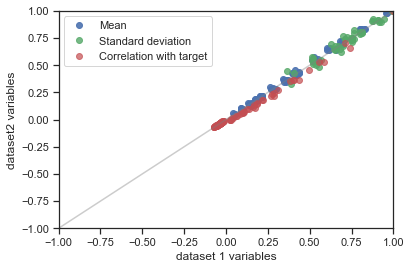

In [56]:
ad1.compare_marginals(ad2, method='all', target='0.0') # if no target, it uses the defined class

# 6. Generation

#### Copy

In [138]:
gen = ad.generators.Copycat()
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3986,29,47,43,0.445684,39,45,-0.873365,0.068958,27,18,13,3
730,40,33,54,1.464963,29,48,-0.074571,0.883333,33,26,19,3
3969,27,40,47,-0.691203,50,53,-0.394089,-0.951545,13,35,19,3
3258,33,40,55,1.602174,34,62,1.157854,1.440892,22,24,5,3
847,8,23,43,-1.004828,56,36,-1.580869,-0.755555,16,36,18,2


#### Additive Noise Model

In [139]:
gen = ad.generators.ANM() # use 'model' parameter to use custom model for imputation
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,16,42,47,-0.926422,20,64,-0.097394,-0.144605,15,40,15,3
1,39,35,38,-0.212927,40,62,0.564464,0.325773,31,34,17,4
2,41,25,27,-0.985226,39,50,-0.492227,-0.398041,1,45,17,2
3,27,42,53,-0.840175,39,39,-0.647421,-0.904237,22,40,16,2
4,44,22,29,0.171263,26,47,1.073410,0.533929,16,5,11,2


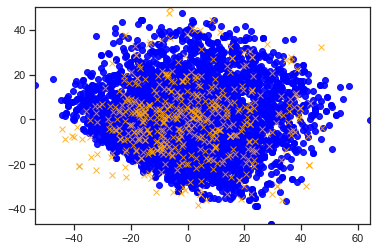

In [140]:
pca1 = data.pca(n_components=2)
pca2 = gen.sample(n=500).pca(n_components=2)
pca1.plot(ad=pca2)

In [ ]:
# Also: 
# - copula (with custom model)
# - VAE
# - GMM
# - KDE

#### Artificial data

In [141]:
gen = ad.generators.Artificial()
gen.sample(n=5)

,0_X,1,0_y
90,-0.175815,0.983277,0
19,1.662475,-0.161477,1
29,-1.114666,-0.037037,0
28,-0.685150,0.739836,0
99,1.259791,-0.378135,1


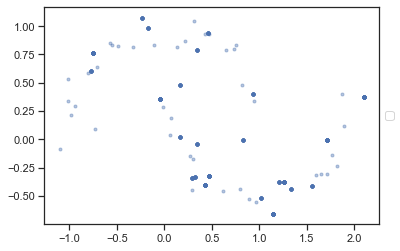

In [143]:
gen.sample(n=100).get_data('X').plot()

In [144]:
gen = ad.generators.Artificial(method='blobs')
gen.sample(n=5)

,0_X,1,0_y
96,9.607131,6.804980,1
29,8.310612,-4.006910,0
64,9.958816,5.650403,1
98,10.163360,-5.257048,0
17,7.822878,-4.201061,2


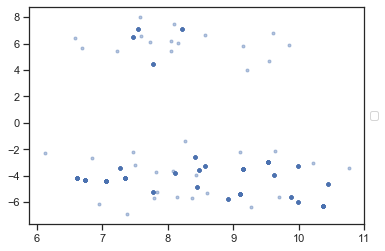

In [145]:
gen.sample(n=100).get_data('X').plot()